# Mineração de Dados Massivos
## Analise de descrição de mercadorias de Notas Fiscais Eletrônicas

# Ambiente

## Bibliotecas

In [1]:
# Iniciando Ambiente
import numpy as np, pandas as pd, time, random
import datetime as dt
import re 

import nltk
from nltk.corpus import stopwords
import unicodedata


# Se necessário, descomente as linhas a seguir para ler as stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\svpon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Módulos

In [2]:
# Módulos de código de programação
#!pip install import-ipynb
import import_ipynb
# Carga de Arquivos
from carga import doCarga
# Tratamento de Dados         
from tratamento import doTratamento
# Processamento Naive Bayers
#from naivebayers import doNaiveBayers

from MLPClassifier import *
from SGDClassifier import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\svpon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


importing Jupyter notebook from carga.ipynb
importing Jupyter notebook from tratamento.ipynb
AGUARDENTE
importing Jupyter notebook from MLPClassifier.ipynb
importing Jupyter notebook from SGDClassifier.ipynb


In [3]:
# Contador de tempo
def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Duração: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

## Variáveis de Ambiente

In [4]:
# Pasta aonde estão os dados
diretorio = '..\\dados\\'
#diretorio = "F:\\Weisner\\Documentos\\MEGA Estudos\\UNB - MDM - Mineração de Dados Massivos\\Artigo\\" 


# Abre arquivo de dados

In [5]:
# Carrega os dados
dfNotas = doCarga(diretorio, opcao=3)
print ("{} registros carregados".format(dfNotas.size))

297438 registros carregados


# Processa se necessário

In [6]:
## Chama processamento manualmente

#df_original = doTratamento(df_original)
#df_original.NovaDescricao
#df_original.info()
#tac()
dfNotas

,Remetente,Categoria,NovaDescricao
0,Fornecedor 001,30.0simsim,CACHACA SAO FRANCISCO 12X970M
1,Fornecedor 001,30.0simsim,CACHACA YPIOCA EMP.OURO
2,Fornecedor 001,30.0simsim,CACHACA YPIOCA OURO
3,Fornecedor 001,30.0simsim,CACHACA YPIOCA PRATA
4,Fornecedor 002,30.0simsim,BB CACHACA SAGATIBA PURA (12) GF
...,...,...,...
99995,Fornecedor 047,38.0simnão,SHAMP.INF.BEBE NATUREZA SUAVE
99996,Fornecedor 047,38.0simnão,SHAMP.INF.BEBE NATUREZA SUAVE
99997,Fornecedor 047,38.0simnão,SHAMP.INF.CARROS II MCQUEEN
99998,Fornecedor 047,38.0simnão,SHAMP.INF.CARROS II MCQUEENNC


## Amostsra dos Dados processados

<AxesSubplot:>

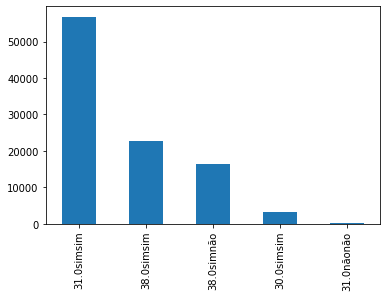

In [7]:
%matplotlib inline
dfNotas['Categoria'].value_counts().plot.bar()

# Naive Bayers

In [8]:
#print (doNaiveBayers(dfNotas))
dfNotas

,Remetente,Categoria,NovaDescricao
0,Fornecedor 001,30.0simsim,CACHACA SAO FRANCISCO 12X970M
1,Fornecedor 001,30.0simsim,CACHACA YPIOCA EMP.OURO
2,Fornecedor 001,30.0simsim,CACHACA YPIOCA OURO
3,Fornecedor 001,30.0simsim,CACHACA YPIOCA PRATA
4,Fornecedor 002,30.0simsim,BB CACHACA SAGATIBA PURA (12) GF
...,...,...,...
99995,Fornecedor 047,38.0simnão,SHAMP.INF.BEBE NATUREZA SUAVE
99996,Fornecedor 047,38.0simnão,SHAMP.INF.BEBE NATUREZA SUAVE
99997,Fornecedor 047,38.0simnão,SHAMP.INF.CARROS II MCQUEEN
99998,Fornecedor 047,38.0simnão,SHAMP.INF.CARROS II MCQUEENNC


# Preleção
Preparação dos datasets utilizado em todos algorítimos

In [9]:
# Identifica quantas classes tem
dfNotas['Categoria'].value_counts()

31.0simsim    56845
38.0simsim    22598
38.0simnão    16433
30.0simsim     3090
31.0nãonão      180
Name: Categoria, dtype: int64

In [15]:
# Separa os constadores
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4 = dfNotas['Categoria'].value_counts()

# Divide datasets por classes
df_class_0 = dfNotas[dfNotas['Categoria'] == 0]
df_class_1 = dfNotas[dfNotas['Categoria'] == 1]
df_class_2 = dfNotas[dfNotas['Categoria'] == 2]
df_class_3 = dfNotas[dfNotas['Categoria'] == 3]
df_class_4 = dfNotas[dfNotas['Categoria'] == 4]         # Classse MUITO pequena - UNDERSAMPLING

# Equipara os tamanhos 30.0simsim que tem 3090 ocorrências
# Foram equiparados ao tamanho da classe 
df_class_0 = df_class_0.sample(count_class_3)
df_class_1 = df_class_0.sample(count_class_3)
df_class_2 = df_class_0.sample(count_class_3)

df_class_0_under = df_class_0.sample(count_class_1)

# Agrupa novamente
dfAjustado = pd.concat([df_class_0_under, df_class_1], axis=0)

56845

In [ ]:
count_class_0, count_class_1, count_class_3, count_class_4 = dfNotas['Categoria'].value_counts()

df_class_0_under = df_class_0.sample(count_class_1)
dfAjustado = pd.concat([df_class_0_under, df_class_1], axis=0)

dfAjustado['BomAluno'].value_counts() 

In [9]:
#  Separar Dados de Atributos
X = dfNotas.iloc[:, 1:2].values  # Categoria
y = dfNotas.iloc[:, 2:3].values  # NovaDescricao

In [12]:
dfNotas['Categoria'].value_counts()

31.0simsim    56845
38.0simsim    22598
38.0simnão    16433
30.0simsim     3090
31.0nãonão      180
Name: Categoria, dtype: int64

In [10]:
count_class_0, count_class_1 = dfNotas['Categoria'].value_counts()

ValueError: too many values to unpack (expected 2)

In [ ]:
# CONTAR CLASSES

# Divide by class
df_class_0 = pfEnade[pfEnade['Publica'] == 1]   # 1 = Privada
df_class_1 = pfEnade[pfEnade['Publica'] == 0]   # 0 = Publica
df_class_0_under = df_class_0.sample(count_class_1)
dfAjustado = pd.concat([df_class_0_under, df_class_1], axis=0)
#dfAjustado['Publica'].value_counts() 

# CARGA - X e y
y = pd.DataFrame(dfAjustado, columns = ['Publica'])
enade_features = [ 'BomAluno','CO_REGIAO_CURSO', 'Jovem', 'Migrado', 'Solo', 'Exatas', 'QE_I23CAT', 'QE_I08CAT', 'Sustento', 'Sexo'] 
# , 'Familia', , 'NU_IDADE' BaixaRenda
# , 'Tempo', 'RecemFormado', 'QE_I08CAT', 'Age'
# Ou solo ou família

X = dfAjustado[enade_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
return X, y, X_train, X_test, y_train, y_test

In [11]:
y

array([['CACHACA SAO FRANCISCO 12X970M'],
       ['CACHACA YPIOCA EMP.OURO'],
       ['CACHACA YPIOCA OURO'],
       ['CACHACA YPIOCA PRATA'],
       ['BB CACHACA SAGATIBA PURA  (12) GF'],
       ['10% AG COMP CARVALHO  (12)'],
       ['WEBER HAUS CACHACA LUNDU GOLD'],
       ['WEBER HAUS CACHACA LUNDU PRATA'],
       ['WEBER HAUS CACHACA PREMIUM'],
       ['WEBER HAUS CACHACA EXTRA PREMIUM'],
       ['WEBER HAUS CACHACA PRATA'],
       ['PIRASSUNUNGA'],
       ['PIRASSUNUNGA  CX. PAP.12X1'],
       ['PIRASSUNUNGA  CX. PAP.12X1 C/ GARRAFAS'],
       ['WEBER HAUS CACHACA ENV. AMBURANA ORGANICA'],
       ['WEBER HAUS CACHACA PRATA'],
       ['WEBER HAUS CACHACA PREMIUM'],
       ['WEBER HAUS CACHACA ORGANICA ENVELHECIDA'],
       ['PIRASSUNUNGA OURO COD13285'],
       ['PIRASSUNUNGA SMOKED COD'],
       ['WEBER HAUS CACHACA PREMIUM'],
       ['WEBER HAUS CACHACA PREMIUM'],
       ['OLD CESAR'],
       ['OLD CESAR C/ COPO'],
       ['AG  PET'],
       ['AG'],
       ['AG 1LI TERRA BRAZILI

### Categórico para Numérico

In [56]:
# Prepara os Enconders para cada categria
from sklearn.preprocessing import LabelEncoder
categoria = LabelEncoder()
X[:, 0] = categoria.fit_transform(X[:, 0])
## TODO ONE HOT ENCODER

In [ ]:
#Grava até este ponto pra ganhar tempo
import pickle
with open('atributos_encode.pkl', 'wb') as f:
    pickle.dump([X, y], f)

In [58]:
from sklearn.naive_bayes import GaussianNB # Distribuição Normal
naive_Classificacao = GaussianNB()
naive_Classificacao.fit(X, y) # Treinamento

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [59]:
previsao = naive_Classificacao.predict('bebida')

ValueError: Expected 2D array, got scalar array instead:
array=bebida.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# MLPClassifier

# SGDCClassifier